In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import sklearn as sk 
#from sklearn.cross_validation import train_test_split
import random
 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/kjot0/Documents/DATA ANALYST TRAINING/Course 4 Programming Basics and Data Analyics with Python/Final Project Dataset/googleplaystore.csv')

In [3]:
#Check for null values in the data. Get the number of null values for each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
#Drop records with nulls in any of the columns. 
df.dropna(inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

In [8]:
df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10834     2600000.0
10836    53000000.0
10837     3600000.0
10839     3600000.0
10840    19000000.0
Name: Size, Length: 9360, dtype: float64

In [9]:
df[["Size"]] = df[["Size"]].astype("int")

In [10]:
df['Size'].dtype

dtype('int32')

In [11]:
#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

In [12]:
# Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df[["Reviews"]] = df[["Reviews"]].astype("float")

In [13]:
#Installs field is currently stored as string and has values like 1,000,000+. 
#Treat 1,000,000+ as 1,000,000
#remove ‘+’, ‘,’ from the field, convert it to integer

df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [14]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64

In [15]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

In [16]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value 
# outside this range.
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [17]:
df[["Reviews"]]

,Reviews
0,159.0
1,967.0
2,87510.0
3,215644.0
4,967.0
...,...
10834,7.0
10836,38.0
10837,4.0
10839,114.0


In [18]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.
df[['Type', 'Price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    9360 non-null   object 
 1   Price   9360 non-null   float64
dtypes: float64(1), object(1)
memory usage: 219.4+ KB


In [44]:
df["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [45]:
df["Price"]==0

0        True
1        True
2        True
3        True
4        True
         ... 
10834    True
10836    True
10837    True
10839    True
10840    True
Name: Price, Length: 8870, dtype: bool

In [46]:
# to get all rows in output
pd.set_option('display.max_rows', None)

In [47]:
(df["Type"]=="Free") & (df["Price"]==0)

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
24        True
25        True
26        True
27        True
28        True
29        True
30        True
31        True
32        True
33        True
34        True
35        True
36        True
37        True
38        True
39        True
40        True
41        True
42        True
43        True
44        True
45        True
46        True
47        True
48        True
49        True
50        True
51        True
52        True
53        True
54        True
55        True
56        True
57        True
58        True
59        True
60        True
61        True
62        True
63        True
64        True
65        True
66        True
67        True
68        

In [48]:
df[(df["Type"]=="Free") & (df["Price"]!=0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [49]:
df[(df["Type"]=="Paid") & (df["Price"]!=0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800000,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000000,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,2300000,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,26000000,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
477,Calculator,DATING,2.6,57.0,6200000,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.5,2.0,17000000,100,Paid,7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up
571,"Moco+ - Chat, Meet People",DATING,4.2,1546.0,44000000,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up
851,Sago Mini Hat Maker,EDUCATION,4.9,11.0,63000000,1000,Paid,3.99,Everyone,Education;Pretend Play,"July 24, 2017",1.0,4.0.3 and up


In [50]:
(df["Type"]=="Free") & (df["Price"]!=0)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       False
67       False
68       F

In [51]:
# to go back to default truncated output values
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\kjot0\anaconda3\lib\site-packages\pandas\_config\config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [53]:
(df["Type"]=="Free") & (df["Price"]!=0)

0        False
1        False
2        False
3        False
4        False
         ...  
10834    False
10836    False
10837    False
10839    False
10840    False
Length: 8870, dtype: bool

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   int32  
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 987.2+ KB


In [52]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

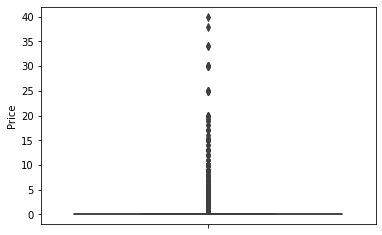

In [110]:
#Performing univariate analysis: 
#Boxplot for Price
plt.figure(figsize = (10,10))
sns.boxplot(y="Price", data=df)

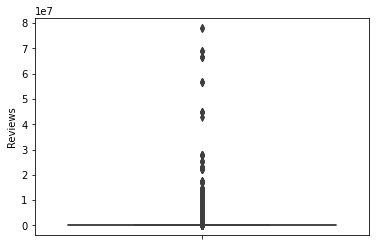

In [23]:
sns.boxplot(y="Reviews", data=df)

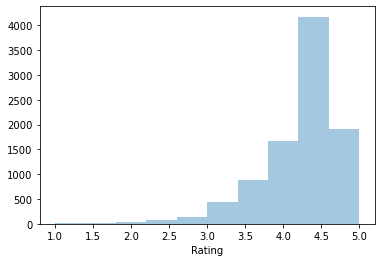

In [24]:
sns.distplot(df['Rating'],kde=False,bins=10)

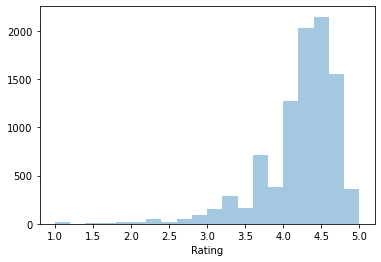

In [25]:
sns.distplot(df['Rating'],kde=False,bins=20)

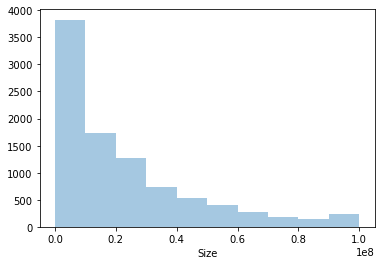

In [26]:
sns.distplot(df['Size'],kde=False,bins=10)

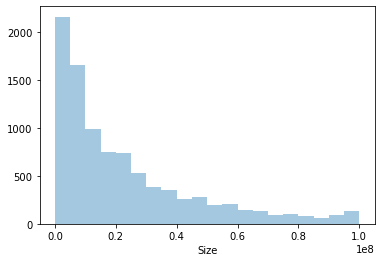

In [27]:
sns.distplot(df['Size'],kde=False,bins=20)

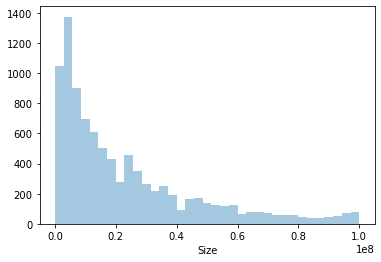

In [28]:
sns.distplot(df['Size'],kde=False,bins=35)

In [29]:
df[df['Price']>70]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32000000,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32000000,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1500000,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800000,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700000,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600000,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700000,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900000,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up


In [30]:
df[df['Price']>80]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500000,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800000,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700000,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600000,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700000,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900000,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965000,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [31]:
df.shape

(9360, 13)

In [32]:
# Remove rows having price greater than 80  
df = df.loc[df["Price"]<79.99]

In [33]:
df.shape

(9343, 13)

In [34]:
# Drop records having more than 2 million reviews.
df = df.loc[df["Reviews"]<2000000]

In [35]:
df.shape

(8890, 13)

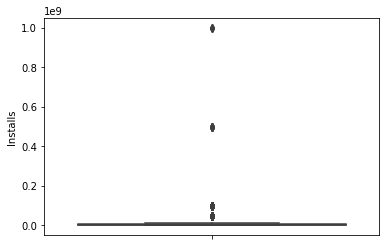

In [36]:
sns.boxplot(y="Installs", data=df)

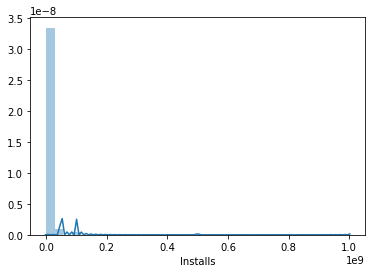

In [37]:
sns.distplot(df['Installs'],kde=True,bins=35)

In [38]:
df['Installs'].unique

<bound method Series.unique of 0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8890, dtype: int64>

In [39]:
df['Installs'].value_counts()

1000000       1576
10000000      1238
100000        1149
10000         1004
5000000        752
1000           706
500000         537
50000          465
5000           428
100            308
50000000       247
500            201
100000000      122
10              69
50              56
500000000       14
5                9
1000000000       6
1                3
Name: Installs, dtype: int64

In [40]:
df['Installs'].describe()

count    8.890000e+03
mean     6.263855e+06
std      3.538995e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [41]:
# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
print("50th percentile of Installs: ",
       np.percentile( df['Installs'], 50))
print("25th percentile of Installs : ",
       np.percentile(df['Installs'], 25))
print("75th percentile of Installs : ",
       np.percentile(df['Installs'], 75))
print("90th percentile of Installs : ",
       np.percentile(df['Installs'], 90))
print("95th percentile of Installs : ",
       np.percentile(df['Installs'], 95))
print("99th percentile of Installs : ",
       np.percentile(df['Installs'], 99))

50th percentile of Installs:  500000.0
25th percentile of Installs :  10000.0
75th percentile of Installs :  5000000.0
90th percentile of Installs :  10000000.0
95th percentile of Installs :  10000000.0
99th percentile of Installs :  100000000.0


In [42]:
df = df.loc[df["Installs"]<500000000]   

In [43]:
df.shape

(8870, 13)

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

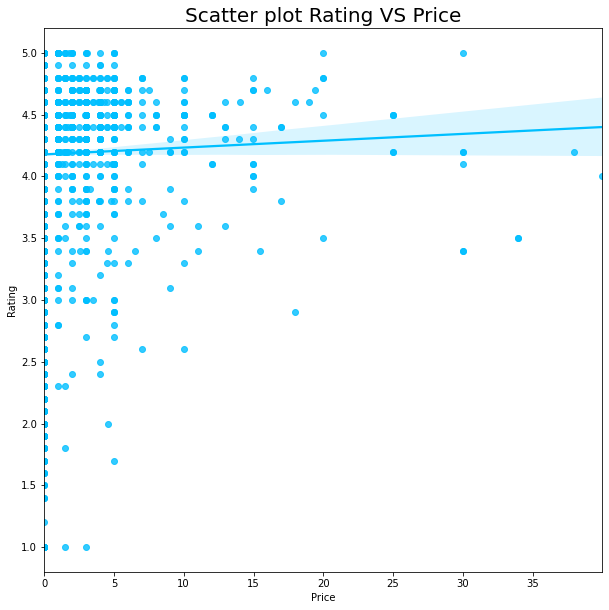

In [54]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price", y="Rating", color = 'deepskyblue',data=df);
plt.title('Scatter plot Rating VS Price',size = 20)

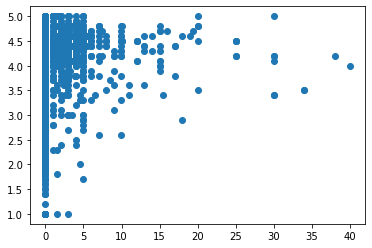

In [55]:
A=df["Price"]
B=df["Rating"]
c = ('red')
plt.scatter(A, B)

plt.show()

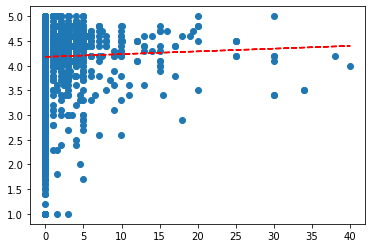

In [56]:
A=df["Price"]
B=df["Rating"]
plt.scatter(A, B)

z = np.polyfit(A, B, 1)
p = np.poly1d(z)
plt.plot(A,p(A),"r--")

plt.show()

In [ ]:
did not find any relationship between Rating and Price

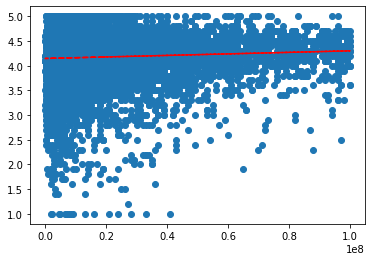

In [57]:
A=df["Size"]
B=df["Rating"]
plt.scatter(A, B)

z = np.polyfit(A, B, 1)
p = np.poly1d(z)
plt.plot(A,p(A),"r--")

plt.show()

Text(0.5, 1.0, 'Scatter plot Size VS Rating')

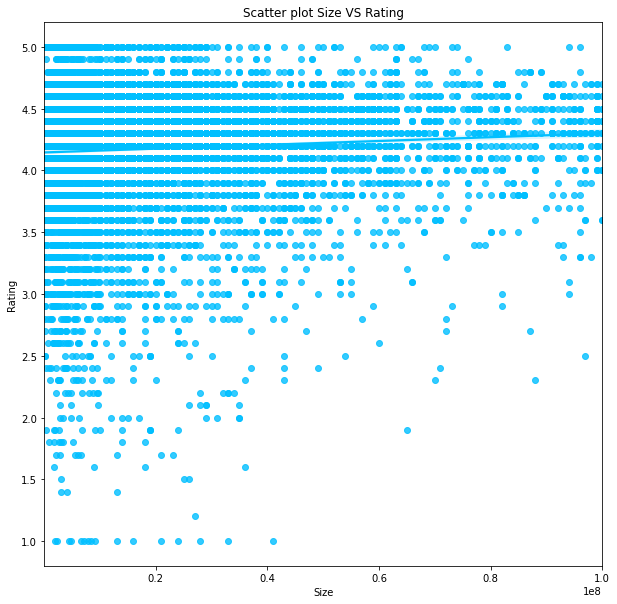

In [58]:
plt.figure(figsize = (10,10))
sns.regplot(x="Size", y="Rating", color = 'deepskyblue',data=df);
plt.title('Scatter plot Size VS Rating')

Text(0.5, 1.0, 'Scatter plot Rating VS Review')

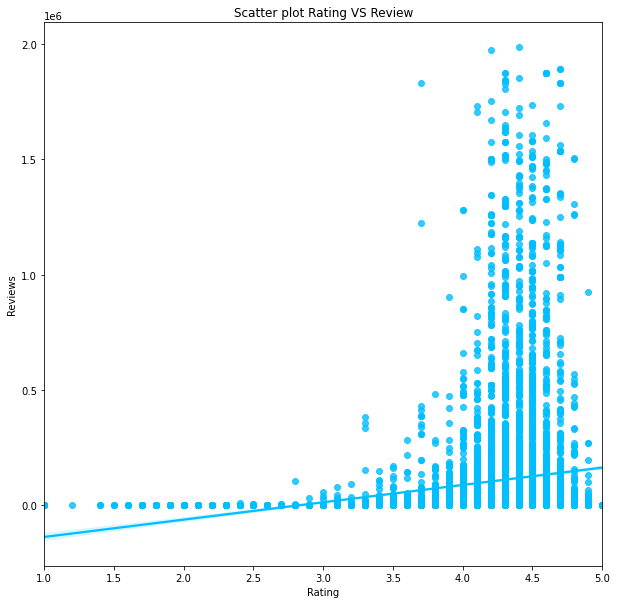

In [59]:
plt.figure(figsize = (10,10))
sns.regplot(x="Rating", y="Reviews", color = 'deepskyblue',data=df);
plt.title('Scatter plot Rating VS Review')

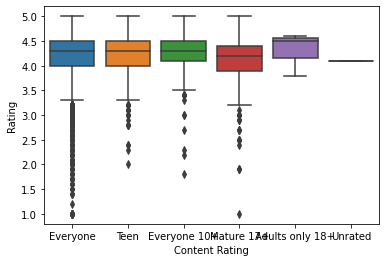

In [60]:
sns.boxplot(x="Content Rating", y="Rating", data=df)

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

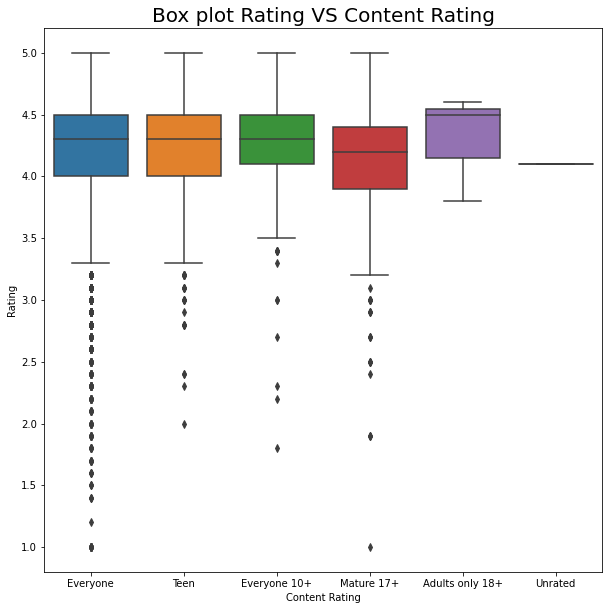

In [61]:
plt.figure(figsize = (10,10))
sns.boxplot(x="Content Rating", y="Rating", data=df)
plt.title('Box plot Rating VS Content Rating',size = 20)

Text(0.5, 1.0, 'Rating VS Category')

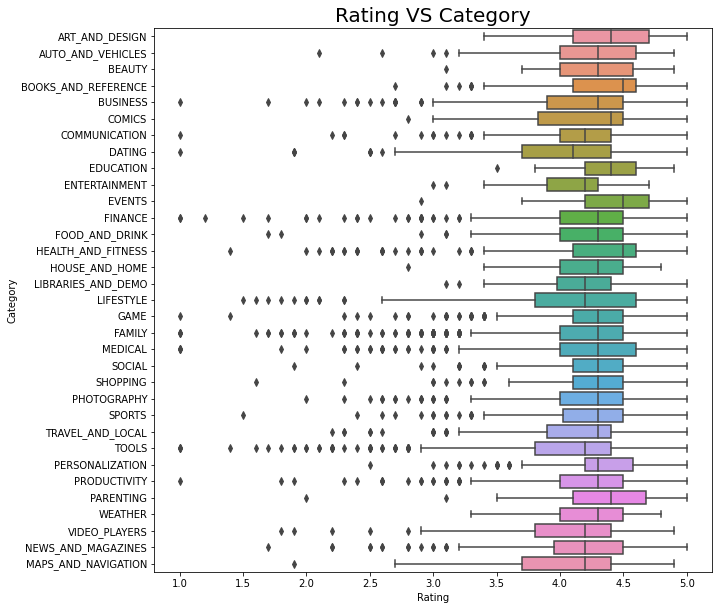

In [62]:
plt.figure(figsize = (10,10))
sns.boxplot(x="Rating", y="Category", data=df)
plt.title('Rating VS Category',size = 20)

In [63]:
# transforming categorical into numerical data
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [64]:
df['Type'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Distribution of Size')

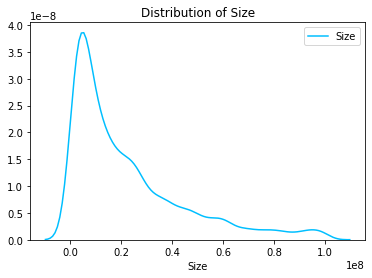

In [65]:
g = sns.kdeplot(df.Size, color="deepskyblue")
g.set_xlabel("Size")
plt.title('Distribution of Size')

Text(0.5, 1.0, 'Distribution of Size')

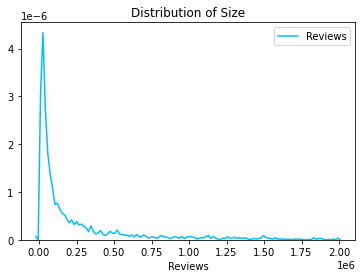

In [66]:
g = sns.kdeplot(df.Reviews, color="deepskyblue")
g.set_xlabel("Reviews")
plt.title('Distribution of Size')

Text(0.5, 1.0, 'Distribution of Size')

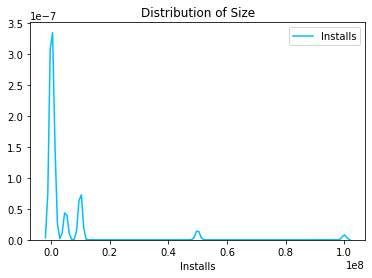

In [67]:
g = sns.kdeplot(df.Installs, color="deepskyblue")
g.set_xlabel("Installs")
plt.title('Distribution of Size')

In [68]:
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [75]:
import numpy as np
  
InstallsO = df["Installs"] 
InstallsN = np.log1p(InstallsO)

In [76]:
ReviewsO = df["Reviews"]
ReviewsN = np.log1p(ReviewsO)

In [78]:
df['InstallsN'] = InstallsN
df['ReviewsN'] = ReviewsN

Text(0.5, 1.0, 'Distribution of InstallsN')

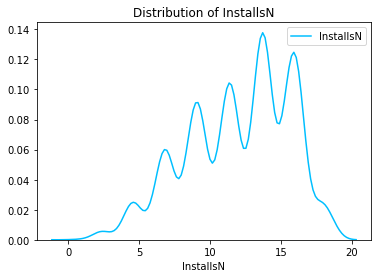

In [79]:
g = sns.kdeplot(df.InstallsN, color="deepskyblue")
g.set_xlabel("InstallsN")
plt.title('Distribution of InstallsN')

Text(0.5, 1.0, 'Distribution of ReviewsN')

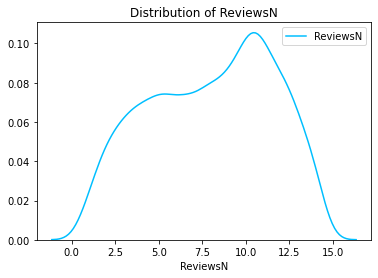

In [80]:
g = sns.kdeplot(df.ReviewsN, color="deepskyblue")
g.set_xlabel("ReviewsN")
plt.title('Distribution of ReviewsN')

In [81]:
df

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,InstallsN,ReviewsN
0,ART_AND_DESIGN,4.1,159.0,19000000,10000,0,0.0,Everyone,Art & Design,9.210440,5.075174
1,ART_AND_DESIGN,3.9,967.0,14000000,500000,0,0.0,Everyone,Art & Design;Pretend Play,13.122365,6.875232
2,ART_AND_DESIGN,4.7,87510.0,8700000,5000000,0,0.0,Everyone,Art & Design,15.424949,11.379520
3,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,0,0.0,Teen,Art & Design,17.727534,12.281389
4,ART_AND_DESIGN,4.3,967.0,2800000,100000,0,0.0,Everyone,Art & Design;Creativity,11.512935,6.875232
...,...,...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7.0,2600000,500,0,0.0,Everyone,Education,6.216606,2.079442
10836,FAMILY,4.5,38.0,53000000,5000,0,0.0,Everyone,Education,8.517393,3.663562
10837,FAMILY,5.0,4.0,3600000,100,0,0.0,Everyone,Education,4.615121,1.609438
10839,BOOKS_AND_REFERENCE,4.5,114.0,3600000,1000,0,0.0,Mature 17+,Books & Reference,6.908755,4.744932


In [82]:
df['Content Rating']

0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10834      Everyone
10836      Everyone
10837      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 8870, dtype: object

In [83]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [84]:
#Cleaning of content rating classification (make it numerical from categorical )
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)


In [85]:
df['Content Rating'].unique()

array([0, 1, 2, 3, 4, 5])

In [86]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual',
       'Casual;Pretend Play', 'Action', 'Puzzle', 'Arcade', 'Music',
       'Word', 'Racing', 'Casual;Creativity', 'Sports', 'Simulation',
       'Board', 'Role Playing', 'Adventure', 'Strategy',
       'Simulation;Education', 'Action;Action & Adventure', 'Trivia',
       'Casual;Brain Games', 'Simulation

In [87]:
#Cleaning of Genres classification (make it numerical from categorical ): making new column of numeric values
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

In [88]:
df['Genres_c'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114])

In [89]:
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,InstallsN,ReviewsN,Genres_c
0,ART_AND_DESIGN,4.1,159.0,19000000,10000,0,0.0,0,Art & Design,9.210440,5.075174,0
1,ART_AND_DESIGN,3.9,967.0,14000000,500000,0,0.0,0,Art & Design;Pretend Play,13.122365,6.875232,1
2,ART_AND_DESIGN,4.7,87510.0,8700000,5000000,0,0.0,0,Art & Design,15.424949,11.379520,0
3,ART_AND_DESIGN,4.5,215644.0,25000000,50000000,0,0.0,1,Art & Design,17.727534,12.281389,0
4,ART_AND_DESIGN,4.3,967.0,2800000,100000,0,0.0,0,Art & Design;Creativity,11.512935,6.875232,2


In [90]:
# Get dummy columns for Category
inp2 = pd.get_dummies(df, columns=['Category'])

In [91]:
inp2

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,InstallsN,ReviewsN,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,159.0,19000000,10000,0,0.0,0,Art & Design,9.210440,5.075174,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14000000,500000,0,0.0,0,Art & Design;Pretend Play,13.122365,6.875232,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8700000,5000000,0,0.0,0,Art & Design,15.424949,11.379520,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,25000000,50000000,0,0.0,1,Art & Design,17.727534,12.281389,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2800000,100000,0,0.0,0,Art & Design;Creativity,11.512935,6.875232,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,7.0,2600000,500,0,0.0,0,Education,6.216606,2.079442,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,38.0,53000000,5000,0,0.0,0,Education,8.517393,3.663562,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,4.0,3600000,100,0,0.0,0,Education,4.615121,1.609438,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,114.0,3600000,1000,0,0.0,3,Books & Reference,6.908755,4.744932,...,0,0,0,0,0,0,0,0,0,0


In [92]:
inp2.drop(labels = ['Installs','Reviews'], axis = 1, inplace = True)

In [93]:
inp2

,Rating,Size,Type,Price,Content Rating,Genres,InstallsN,ReviewsN,Genres_c,Category_ART_AND_DESIGN,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,4.1,19000000,0,0.0,0,Art & Design,9.210440,5.075174,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.9,14000000,0,0.0,0,Art & Design;Pretend Play,13.122365,6.875232,1,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,8700000,0,0.0,0,Art & Design,15.424949,11.379520,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.5,25000000,0,0.0,1,Art & Design,17.727534,12.281389,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.3,2800000,0,0.0,0,Art & Design;Creativity,11.512935,6.875232,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,2600000,0,0.0,0,Education,6.216606,2.079442,11,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,53000000,0,0.0,0,Education,8.517393,3.663562,11,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,3600000,0,0.0,0,Education,4.615121,1.609438,11,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,3600000,0,0.0,3,Books & Reference,6.908755,4.744932,5,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
inp2.columns

Index(['Rating', 'Size', 'Type', 'Price', 'Content Rating', 'Genres',
       'InstallsN', 'ReviewsN', 'Genres_c', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION',
       'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY',
       'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME',
       'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME',
       'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE',
       'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL',
       'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING',
       'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY',
       'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL',
       'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER'],
      

In [95]:
X = inp2.drop(labels = ['Rating','Genres'],axis = 1) 
y = inp2['Rating']

In [96]:
X

,Size,Type,Price,Content Rating,InstallsN,ReviewsN,Genres_c,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,19000000,0,0.0,0,9.210440,5.075174,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14000000,0,0.0,0,13.122365,6.875232,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8700000,0,0.0,0,15.424949,11.379520,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25000000,0,0.0,1,17.727534,12.281389,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2800000,0,0.0,0,11.512935,6.875232,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,2600000,0,0.0,0,6.216606,2.079442,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,53000000,0,0.0,0,8.517393,3.663562,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,3600000,0,0.0,0,4.615121,1.609438,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,3600000,0,0.0,3,6.908755,4.744932,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lm = LinearRegression()

In [101]:
lm.fit(X_train,y_train)

LinearRegression()

In [102]:
# print the intercept
print(lm.intercept_)

4.726407909399037


In [103]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Size,5.789456e-11
Type,-4.792607e-02
Price,-7.740254e-03
Content Rating,-2.711764e-02
InstallsN,-1.476360e-01
ReviewsN,1.697581e-01
Genres_c,-1.939350e-03
Category_ART_AND_DESIGN,1.684420e-01
Category_AUTO_AND_VEHICLES,3.026337e-02
Category_BEAUTY,1.239752e-01


In [104]:
predictions = lm.predict(X_test)

In [105]:
predictions

array([4.05883984, 4.10070745, 4.12275852, ..., 4.23976921, 4.08140375,
       4.35337045])

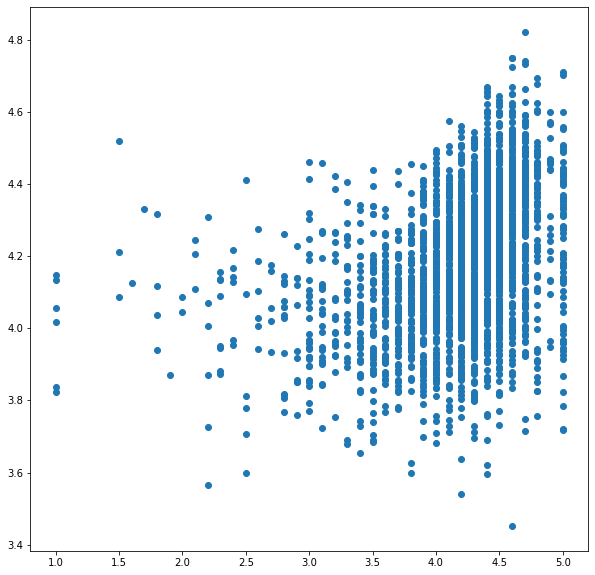

In [106]:
plt.figure(figsize = (10,10))
plt.scatter(y_test,predictions)

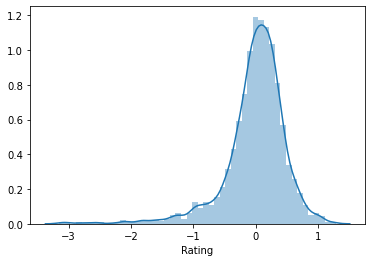

In [107]:
sns.distplot((y_test-predictions),bins=50);

In [108]:
print('R Sq:', metrics.r2_score(y_test, predictions))

R Sq: 0.13541072908624208
